In [1180]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mplsoccer import Pitch

In [1181]:
BASE_DIR = os.path.join('..', 'data')

In [1182]:
import warnings
warnings.filterwarnings("ignore")

In [1183]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [1184]:
grouped_events = sb.competition_events(
    country="Germany",
    division= "1. Bundesliga",
    season="2023/2024",
    split=True
)
grouped_events["passes"]

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_technique,pass_deflected,pass_outswinging,pass_through_ball,pass_cut_back,pass_goal_assist,out,pass_miscommunication,pass_no_touch,pass_straight
0,221b0c8d-6386-4ae8-bb4a-a1dc98742312,5,1,00:00:03.417,0,3,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ff56e821-21e9-4cef-ba2a-7eb5eb3769c6,8,1,00:00:04.732,0,4,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4464cb75-f45f-4508-8444-2560d1625d06,11,1,00:00:07.622,0,7,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b88bbf46-30c8-4c60-b8cc-6d855f94f990,15,1,00:00:10.352,0,10,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63a6070e-0c56-4615-8bab-8f6792d5562a,18,1,00:00:11.461,0,11,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39209,d0488ae0-4041-4e6a-a9f8-8b1182c02689,3721,2,00:50:26.395,95,26,Pass,179,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39210,780dd452-10ec-4e84-b67c-b3d222ba96e7,3726,2,00:50:30.854,95,30,Pass,179,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39211,c8be99c4-3434-40cf-b56b-c8e90a163127,3731,2,00:50:41.710,95,41,Pass,181,RB Leipzig,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39212,29d2f698-9c75-4303-aac1-88ccb38caac5,3733,2,00:50:44.109,95,44,Pass,181,RB Leipzig,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1185]:
grouped_events["passes"].pass_outcome.value_counts()

pass_outcome
Incomplete          5185
Out                  448
Unknown              135
Pass Offside          98
Injury Clearance      16
Name: count, dtype: int64

In [1186]:
df = grouped_events["passes"]

In [1187]:
df = df[(df.pass_outcome != 'Injury Clearance') & (df.pass_outcome != 'Out')]
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'pass_recipient', 'pass_length', 'pass_angle', 'pass_height',
       'pass_end_location', 'pass_body_part', 'pass_type',
       'possession_team_id', 'team_id', 'player_id', 'pass_recipient_id',
       'under_pressure', 'pass_outcome', 'counterpress', 'pass_aerial_won',
       'off_camera', 'pass_switch', 'pass_cross', 'pass_assisted_shot_id',
       'pass_shot_assist', 'pass_inswinging', 'pass_technique',
       'pass_deflected', 'pass_outswinging', 'pass_through_ball',
       'pass_cut_back', 'pass_goal_assist', 'out', 'pass_miscommunication',
       'pass_no_touch', 'pass_straight'],
      dtype='object')

In [1188]:
passes = df.copy()

passes["x"] = passes.location.apply(lambda pos: list(pos)[0] * 105/120)
passes["y"] = passes.location.apply(lambda pos: (80 - list(pos)[1]) * 68/80)
passes["endX"] = passes.pass_end_location.apply(lambda pos: list(pos)[0] * 105/120)
passes["endY"] = passes.pass_end_location.apply(lambda pos: (80 - list(pos)[1]) * 68/80)

passes = passes.loc[(((passes["endX"] != 0) & (passes["endY"] != 68)) & ((passes["endX"] != 105) & (passes["endY"] != 0)))]

In [1189]:
passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_cut_back,pass_goal_assist,out,pass_miscommunication,pass_no_touch,pass_straight,x,y,endX,endY
0,221b0c8d-6386-4ae8-bb4a-a1dc98742312,5,1,00:00:03.417,0,3,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,53.3750,33.915,51.6250,33.235
1,ff56e821-21e9-4cef-ba2a-7eb5eb3769c6,8,1,00:00:04.732,0,4,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,51.6250,33.490,30.7125,31.280
2,4464cb75-f45f-4508-8444-2560d1625d06,11,1,00:00:07.622,0,7,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,30.7125,30.855,29.0500,13.770
3,b88bbf46-30c8-4c60-b8cc-6d855f94f990,15,1,00:00:10.352,0,10,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,28.6125,12.495,38.9375,1.870
4,63a6070e-0c56-4615-8bab-8f6792d5562a,18,1,00:00:11.461,0,11,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,38.9375,2.125,54.4250,12.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39209,d0488ae0-4041-4e6a-a9f8-8b1182c02689,3721,2,00:50:26.395,95,26,Pass,179,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,80.5000,57.120,84.4375,48.960
39210,780dd452-10ec-4e84-b67c-b3d222ba96e7,3726,2,00:50:30.854,95,30,Pass,179,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,71.9250,45.645,74.9000,19.125
39211,c8be99c4-3434-40cf-b56b-c8e90a163127,3731,2,00:50:41.710,95,41,Pass,181,RB Leipzig,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,30.9750,48.280,30.1875,13.345
39212,29d2f698-9c75-4303-aac1-88ccb38caac5,3733,2,00:50:44.109,95,44,Pass,181,RB Leipzig,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,30.1875,11.730,49.8750,15.300


In [1190]:
def is_progressive(x, y, end_x, end_y):
    start_dist = np.sqrt((105 - x)**2 + (34 - y)**2)
    end_dist = np.sqrt((105 - end_x)**2 + (34 - end_y)**2)

    thres = 100
    if x < 52.5 and end_x < 52.5:
        thres = 30
    elif x < 52.5 and end_x >= 52.5:
        thres = 15
    elif x >= 52.5 and end_x >= 52.5:
        thres = 10
    if thres > start_dist - end_dist:
        return False
    else:
        return True

In [1191]:
passes["is_progressive"] = passes.apply(lambda row : is_progressive(row['x'], row['y'], row['endX'], row['endY']), axis = 1)
passes = passes[passes['is_progressive'] == True]
passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_goal_assist,out,pass_miscommunication,pass_no_touch,pass_straight,x,y,endX,endY,is_progressive
4,63a6070e-0c56-4615-8bab-8f6792d5562a,18,1,00:00:11.461,0,11,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,38.9375,2.125,54.4250,12.070,True
8,76ebbb25-3467-413b-8497-f3e38f998e57,32,1,00:00:17.549,0,17,Pass,2,Werder Bremen,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,54.8625,21.080,75.9500,36.635,True
20,7a9e0311-6936-4f6d-aa56-90c0e6ff7b58,70,1,00:00:58.628,0,58,Pass,3,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,79.1000,5.695,89.8625,14.025,True
29,3d4abe17-e64b-4535-89b6-51ae231a8f93,99,1,00:01:22.960,1,22,Pass,5,Bayer Leverkusen,Regular Play,...,NaN,NaN,NaN,NaN,NaN,68.4250,4.760,93.8000,20.910,True
31,9567c2e9-b970-4b92-b4ae-7843a912906d,109,1,00:01:52.335,1,52,Pass,6,Werder Bremen,From Goal Kick,...,NaN,NaN,NaN,NaN,NaN,6.8250,31.705,47.5125,5.185,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39179,06fa3a62-f357-4b48-89ff-3f87eadabede,3600,2,00:47:03.537,92,3,Pass,173,Bayer Leverkusen,From Goal Kick,...,NaN,NaN,NaN,NaN,NaN,6.1250,30.515,68.1625,22.185,True
39183,7299cd3c-b007-4e48-94fa-07b52ad686fa,3617,2,00:47:52.123,92,52,Pass,174,Bayer Leverkusen,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,30.8875,20.910,73.2375,20.740,True
39188,17da0ca4-217a-41bf-8e18-ececf6c4f92f,3630,2,00:48:05.525,93,5,Pass,174,Bayer Leverkusen,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,98.8750,12.750,99.2250,28.730,True
39203,6bd595ad-766c-42cb-b0a0-d440f3f00f8f,3694,2,00:49:54.100,94,54,Pass,178,RB Leipzig,From Throw In,...,NaN,NaN,NaN,NaN,NaN,7.8750,65.705,44.1875,46.410,True


In [1192]:
X_train = passes[passes['possession_team_id'] != 904].filter(['x', 'y', 'endX', 'endY', 'pass_angle'])
X_train

,x,y,endX,endY,pass_angle
4,38.9375,2.125,54.4250,12.070,-0.584081
8,54.8625,21.080,75.9500,36.635,-0.649449
31,6.8250,31.705,47.5125,5.185,0.590974
68,11.9875,15.980,45.2375,12.070,0.120466
91,12.2500,9.010,46.6375,30.855,-0.579143
...,...,...,...,...,...
39164,95.2875,65.535,97.2125,41.905,1.491824
39165,80.7625,67.915,82.6000,51.850,1.460139
39176,70.4375,48.790,85.7500,36.210,0.702001
39203,7.8750,65.705,44.1875,46.410,0.500528


In [1193]:
import math

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

wcss = calculate_wcss(X_train)
n = optimal_number_of_clusters(wcss)
n

7

In [1196]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=n, random_state=2345))
])

pipeline.fit(X_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=7, random_state=2345))])

In [1197]:
train_labels = pipeline.predict(X_train)
X_train["cluster"] = train_labels
X_train

,x,y,endX,endY,pass_angle,cluster
4,38.9375,2.125,54.4250,12.070,-0.584081,4
8,54.8625,21.080,75.9500,36.635,-0.649449,0
31,6.8250,31.705,47.5125,5.185,0.590974,5
68,11.9875,15.980,45.2375,12.070,0.120466,5
91,12.2500,9.010,46.6375,30.855,-0.579143,5
...,...,...,...,...,...,...
39164,95.2875,65.535,97.2125,41.905,1.491824,6
39165,80.7625,67.915,82.6000,51.850,1.460139,6
39176,70.4375,48.790,85.7500,36.210,0.702001,6
39203,7.8750,65.705,44.1875,46.410,0.500528,3


In [1198]:
from joblib import dump, load

MODELS_DIR = os.path.join(BASE_DIR, 'models')
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
filename = os.path.join(MODELS_DIR,'passes_clustering_3.joblib')
dump(pipeline, filename)

['..\\data\\models\\passes_clustering_3.joblib']

In [1199]:
def clustering_pipeline(df):
    model = load(filename)
    cluster_df = df.filter(['x', 'y', 'endX', 'endY','pass_angle'])
    labels = model.predict(cluster_df)
    df["cluster"] = labels
    return df

In [1200]:
bayer = passes.loc[(passes["team_id"] == 904)]
bayer["is_progressive"] = bayer.apply(lambda row : is_progressive(row['x'], row['y'], row['endX'], row['endY']), axis = 1)
bayer = bayer[bayer['is_progressive'] == True]
bayer = clustering_pipeline(bayer)

In [1201]:
def create_cluster_passes_map_2(passes_df, title, credit="By: @victormilhomem", color_palette=CLUSTER_PALETTE, n_sample=5):
    top_clusters = list(passes_df["cluster"].value_counts().head(6).index)
    cluster_masks = [passes_df["cluster"] == cluster for cluster in top_clusters]
    cluster_colors = [color_palette[f"color{i+1}"] for i in range(len(top_clusters))]

    fig, axes = plt.subplots(2, 3, figsize=(20, 8))  
    axes = axes.flatten()
    fig.suptitle(title, color='#ffff', fontproperties=FONT_OSWALD, fontsize=25)
    fig.set_facecolor(color_palette["bkg"])

    for ax, cluster_mask, color, cluster_name in zip(axes, cluster_masks, cluster_colors, top_clusters):
        pitch = Pitch(pitch_type='statsbomb', pitch_color=color_palette["bkg"], line_color='#ffff')
        pitch.draw(ax=ax)

        cluster_passes = passes_df[cluster_mask].sample(n=n_sample, random_state=42) if len(passes_df[cluster_mask]) > n_sample else passes_df[cluster_mask]

        pitch.arrows(
            cluster_passes['x'], cluster_passes['y'],
            cluster_passes['endX'], cluster_passes['endY'],
            width=2, headwidth=10, headlength=10, color=color, ax=ax
        )

        ax.set_title(f"Cluster: {cluster_name}", color='#ffff', fontsize=15, fontproperties=FONT_ROBOTO)

    fig.text(0.99, 0.02, credit, va='center', ha='right', fontsize=16,
             fontproperties=FONT_LORA_ITALIC, color='#ffff')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

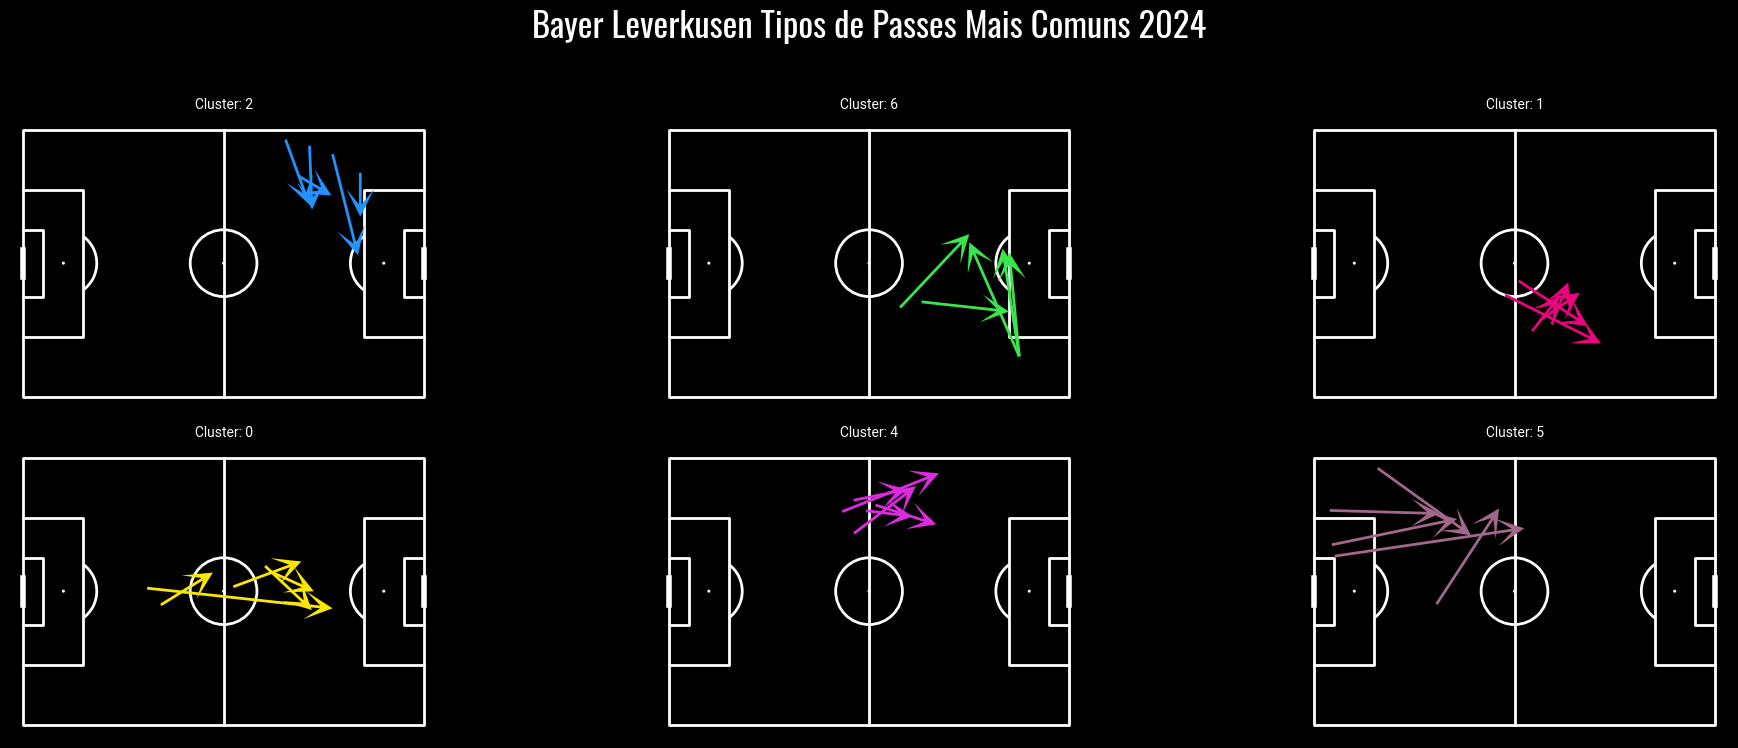

In [1202]:
create_cluster_passes_map_2(bayer, f"Bayer Leverkusen Tipos de Passes Mais Comuns 2024", credit="")

In [1203]:
top_clusters = list(bayer["cluster"].value_counts().head(6).index)
top_clusters

[2, 6, 1, 0, 4, 5]

In [1204]:
bayer[bayer['cluster'] == 5][['pass_height', 'pass_length','cluster']]

,pass_height,pass_length,cluster
413,High Pass,53.189660,5
469,High Pass,39.326454,5
756,Ground Pass,37.019455,5
1001,Ground Pass,34.697550,5
2218,Ground Pass,24.540579,5
...,...,...,...
38655,Ground Pass,25.976336,5
38693,High Pass,69.136460,5
38925,Low Pass,67.010820,5
39179,High Pass,71.574090,5


In [1205]:
bayer[bayer['cluster'] == 0 ][['pass_length']].mean()

pass_length    31.220461
dtype: float64

In [1206]:
bayer[bayer['cluster'] == 1 ][['pass_height', 'pass_length','cluster']]

,pass_height,pass_length,cluster
72,High Pass,36.239895,1
152,Ground Pass,24.792942,1
370,High Pass,15.288231,1
406,Low Pass,19.306475,1
529,Ground Pass,12.611503,1
...,...,...,...
38725,High Pass,12.865458,1
38859,Ground Pass,26.112257,1
39095,High Pass,18.369812,1
39125,Ground Pass,26.368542,1


In [1207]:
bayer[bayer['cluster'] == 1 ][['pass_length']].mean()

pass_length    26.516827
dtype: float64

In [1208]:
comp = sb.competitions()
comp[comp['competition_name'] == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
30,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
31,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
33,43,51,International,FIFA World Cup,male,False,True,1974,2024-02-13T02:52:29.582599,2021-06-13T16:17:31.694,None,2024-02-13T02:52:29.582599
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299
35,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
36,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297


In [1209]:
grouped_events = sb.competition_events(
    country="International",
    division= 'FIFA World Cup',
    season="1970",
    split=True
)
grouped_events["passes"]

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_through_ball,pass_cut_back,pass_cross,pass_goal_assist,out,pass_no_touch,pass_deflected,pass_inswinging,counterpress,pass_miscommunication
0,3e5abdff-873c-4912-941b-855791857d7b,5,1,00:00:00.763,0,0,Pass,2,Brazil,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,850b1564-3796-467d-871d-2fc533802f86,8,1,00:00:02.345,0,2,Pass,2,Brazil,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207e1053-1827-4a25-a172-e63d6cf25850,10,1,00:00:04.229,0,4,Pass,2,Brazil,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135ab730-b14e-4631-a1b1-ec3e7fc3fb82,13,1,00:00:07.370,0,7,Pass,2,Brazil,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,efaeac80-e0e3-4b71-93cc-fdcdf8ecd618,23,1,00:00:15.414,0,15,Pass,3,Peru,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,e37fa660-6cc1-45fe-a1be-1fa3c7e89d44,3464,2,00:46:15.751,91,15,Pass,226,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5333,6835fdd9-c16e-4291-a2e3-b98d0742470c,3466,2,00:46:16.861,91,16,Pass,226,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5334,eb8d1d74-ab60-4baa-84e1-dd0e7024f263,3470,2,00:46:20.172,91,20,Pass,226,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5335,b9e9be9e-1d94-4c7e-a898-e83da4fa57d9,3474,2,00:46:23.027,91,23,Pass,226,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1210]:
world_cup_passes = grouped_events['passes']
pele_passes = world_cup_passes[world_cup_passes['player'] == 'Édson Arantes do Nascimento']
pele_passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_through_ball,pass_cut_back,pass_cross,pass_goal_assist,out,pass_no_touch,pass_deflected,pass_inswinging,counterpress,pass_miscommunication
1,850b1564-3796-467d-871d-2fc533802f86,8,1,00:00:02.345,0,2,Pass,2,Brazil,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,3b26f8da-5f45-4181-b591-2c21cf77f2ba,89,1,00:01:23.554,1,23,Pass,7,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,34b77e64-d2ba-4a25-9743-c6565ffddf48,188,1,00:03:39.700,3,39,Pass,12,Brazil,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,9106c31b-feb7-4269-b0a2-a25897d9aed1,269,1,00:05:34.984,5,34,Pass,18,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,6d8e8c7f-6a70-41d2-bf7e-2999fe5a8eb3,380,1,00:08:59.210,8,59,Pass,24,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,c8d1c82f-c9cd-4903-8aad-22f58241bc2a,3073,2,00:35:24.776,80,24,Pass,200,Brazil,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5247,e495ab71-2cfc-4685-8f6f-ebb01cb1afe7,3149,2,00:37:10.583,82,10,Pass,204,Brazil,From Counter,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
5270,f6d94d34-5d97-4de0-ae2e-75e225b1ad33,3246,2,00:40:42.346,85,42,Pass,211,Czechoslovakia,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,cdf2f235-2914-4907-bea3-8c0089073751,3292,2,00:41:50.190,86,50,Pass,212,Brazil,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1211]:
pele_passes.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'pass_recipient', 'pass_length', 'pass_angle', 'pass_height',
       'pass_end_location', 'pass_body_part', 'pass_type',
       'possession_team_id', 'team_id', 'player_id', 'pass_recipient_id',
       'pass_outcome', 'under_pressure', 'pass_aerial_won', 'off_camera',
       'pass_switch', 'pass_technique', 'pass_outswinging',
       'pass_assisted_shot_id', 'pass_shot_assist', 'pass_straight',
       'pass_through_ball', 'pass_cut_back', 'pass_cross', 'pass_goal_assist',
       'out', 'pass_no_touch', 'pass_deflected', 'pass_inswinging',
       'counterpress', 'pass_miscommunication'],
      dtype='object')

In [1212]:
pele_passes["x"] = pele_passes.location.apply(lambda pos: list(pos)[0] * 105/120)
pele_passes["y"] = pele_passes.location.apply(lambda pos: (80 - list(pos)[1]) * 68/80)
pele_passes["endX"] = pele_passes.pass_end_location.apply(lambda pos: list(pos)[0] * 105/120)
pele_passes["endY"] = pele_passes.pass_end_location.apply(lambda pos: (80 - list(pos)[1]) * 68/80)

pele_passes = pele_passes.loc[(((pele_passes["endX"] != 0) & (pele_passes["endY"] != 68)) & ((pele_passes["endX"] != 105) & (pele_passes["endY"] != 0)))]

pele_passes["is_progressive"] = pele_passes.apply(lambda row : is_progressive(row['x'], row['y'], row['endX'], row['endY']), axis = 1)


In [1213]:
pele_passes = pele_passes[pele_passes['is_progressive'] == True]
pele_passes = clustering_pipeline(pele_passes)

In [1214]:
pele_passes

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_deflected,pass_inswinging,counterpress,pass_miscommunication,x,y,endX,endY,is_progressive,cluster
68,9106c31b-feb7-4269-b0a2-a25897d9aed1,269,1,00:05:34.984,5,34,Pass,18,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,76.6500,26.860,87.4125,31.705,True,2
105,1d9da77f-bf8a-4bea-98ab-d04640aefa83,433,1,00:10:20.812,10,20,Pass,29,Brazil,From Throw In,...,NaN,NaN,NaN,NaN,90.5625,11.730,95.1125,38.250,True,2
117,aef39a08-7b4c-45d7-a642-23464da6ab7f,478,1,00:11:27.701,11,27,Pass,31,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,68.5125,26.180,80.9375,26.350,True,0
255,8884b7a7-e777-4b15-a75b-3a3c593d5a65,986,1,00:24:40.267,24,40,Pass,63,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,46.5500,43.605,64.3125,41.480,True,1
470,1ba0353b-a08f-4b0d-aab3-ebabf2d77138,1734,1,00:45:24.170,45,24,Pass,107,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,70.3500,40.035,83.1250,35.190,True,0
862,2142ff92-8368-4730-9730-598cf92a53b2,3127,2,00:36:06.475,81,6,Pass,195,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,68.9500,37.655,90.9125,29.155,True,0
951,1b84d912-c03b-4ded-9c65-d1d304bf0fcd,3446,2,00:43:21.720,88,21,Pass,212,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,82.4250,32.385,94.2375,28.985,True,2
968,4543191a-7777-4edf-8530-e620f58d8bf8,3507,2,00:44:39.601,89,39,Pass,215,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,84.0875,24.140,96.0750,39.610,True,2
1031,3b04c1b7-f53a-4f26-8011-b354d7abdfdc,220,1,00:03:51.389,3,51,Pass,14,Brazil,Regular Play,...,NaN,NaN,NaN,NaN,79.8000,33.320,91.1750,29.495,True,2
1122,9f2dd71e-c228-47fb-b0cb-fd0474353e80,580,1,00:13:33.210,13,33,Pass,34,Brazil,From Goal Kick,...,NaN,NaN,NaN,NaN,60.5500,7.310,93.1000,21.165,True,4


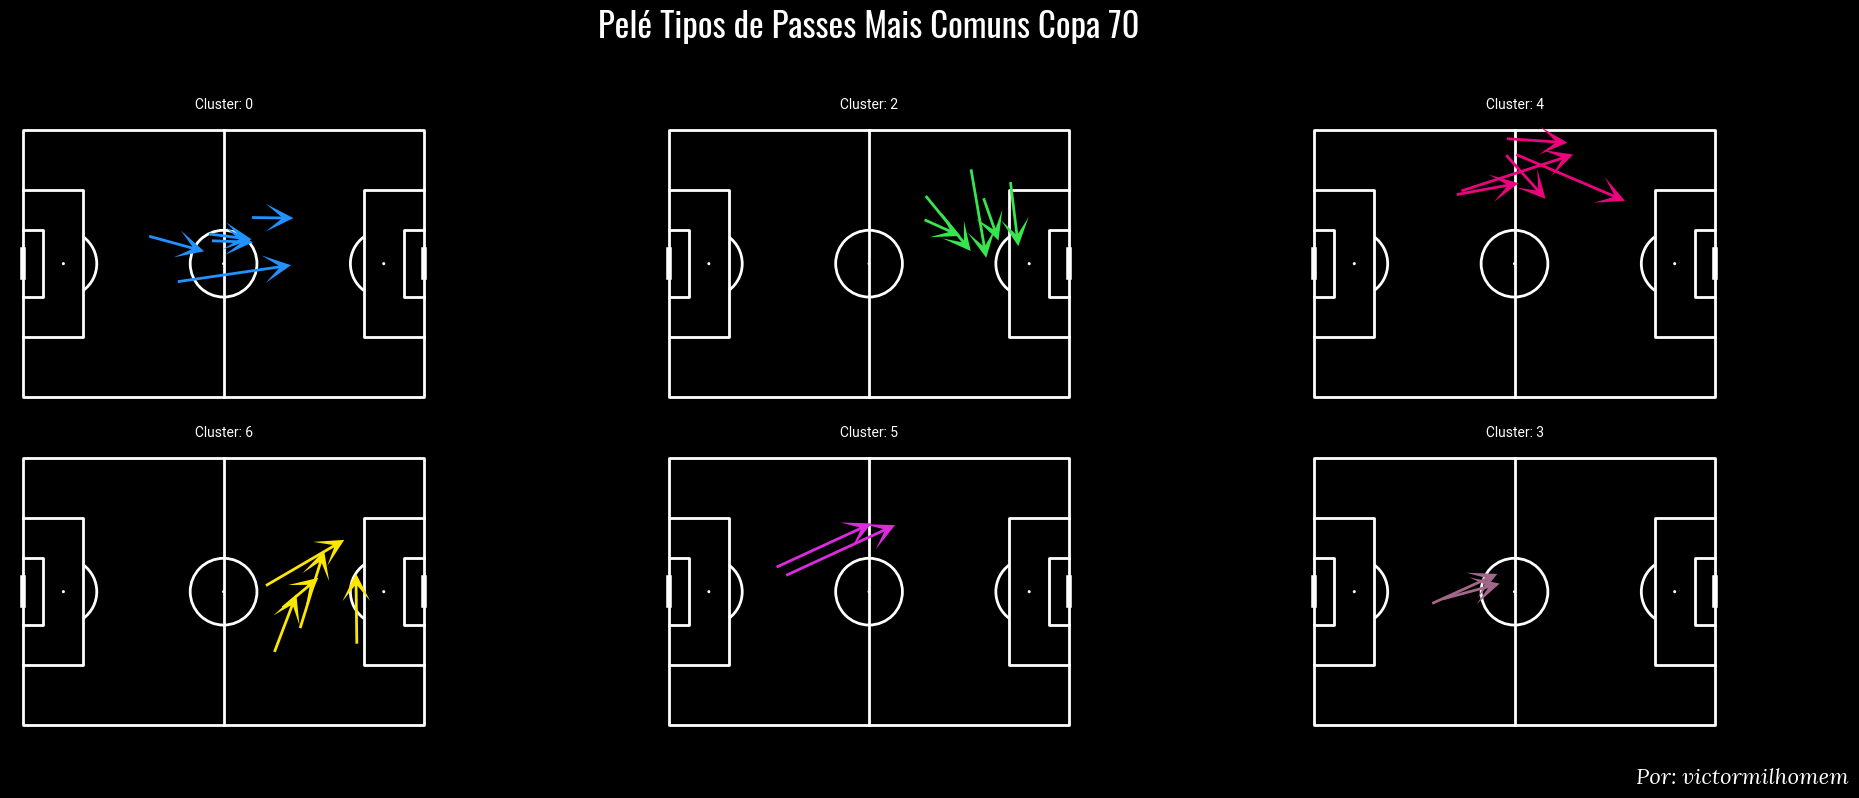

In [1215]:
create_cluster_passes_map_2(pele_passes, f"Pelé Tipos de Passes Mais Comuns Copa 70", credit="Por: victormilhomem")

In [1216]:
top_clusters = list(pele_passes["cluster"].value_counts().head(6).index)
top_clusters

[0, 2, 4, 6, 5, 3]